## Diabetes Prediction

In [1]:
import pandas as pd
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
import tensorflow as tf

2023-08-23 00:39:34.588361: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-23 00:39:34.658320: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-23 00:39:35.767690: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
cols_to_norm = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min())/(x.max() - x.min()))

In [5]:
num_preg = tf.feature_column.numeric_column('Pregnancies')
glucose = tf.feature_column.numeric_column('Glucose')
blood_pressure = tf.feature_column.numeric_column('BloodPressure')
skin_thickness = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


<Axes: >

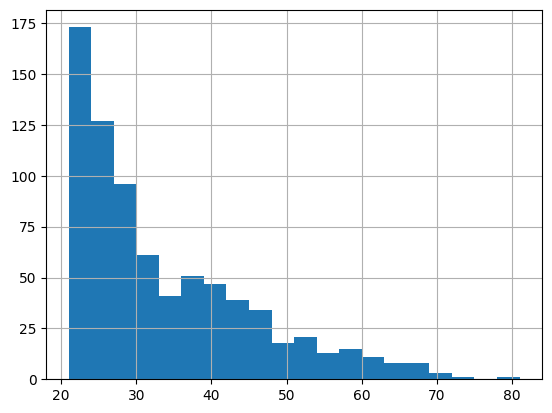

In [6]:
# Convert continuous to categorical
import matplotlib.pyplot as plt
%matplotlib inline
data['Age'].hist(bins=20)


In [7]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries = [20,30,40,50,60,70,80])

# Combine all features
feat_cols = [num_preg, glucose, blood_pressure,skin_thickness, insulin, bmi, diabetes, age_buckets ]

# Split data
x_data = data.drop('Outcome', axis=1)
labels = data['Outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.33, random_state=101)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [8]:
# applying input function
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=pd.DataFrame(X_train), y=pd.Series(y_train),
    batch_size=10, num_epochs=1000, shuffle=True
)

# creating the model
model = tf.estimator.LinearClassifier(feature_columns = feat_cols, n_classes = 2)
model.train(input_fn = input_func, steps = 1000)


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpmaall616', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type'

2023-08-23 00:39:41.055853: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpmaall616/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 222.531
INFO:tensorflow:loss = 0.5068476, step = 100 (0.456 sec)
INFO:tensorflow:global_step/sec: 324.861
INFO:tensorflow:loss = 0.5350086, step = 200 (0.309 sec)
INFO:tensorflow:global_step/sec: 325.901
INFO:tensorflow:loss = 0.582338, step = 300 (0.305 sec)
INFO:tensorflow:global_step/sec: 319.664
INFO:tensorflow:loss = 0.62008584, step = 400 (0.318 sec)
INFO:tensorflow:global_step/sec: 303.05
INFO:tensorflow:loss = 0.4896706, step = 500 (0.321 sec)
INFO:tensorflo

2023-08-23 00:39:46.054468: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): CANCELLED: Enqueue operation was cancelled
	 [[{{node enqueue_input/random_shuffle_queue_EnqueueMany}}]]
2023-08-23 00:39:46.087137: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): CANCELLED: Queue '_0_enqueue_input/random_shuffle_queue' is already closed.
	 [[{{node enqueue_input/random_shuffle_queue_Close}}]]


In [10]:
 # prediction
pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_test,
    batch_size = 10,
    num_epochs = 1,
    shuffle = False
)
predictions = model.predict(pred_input_func)
list(predictions)


INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpmaall616/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.15010285], dtype=float32),
  'logistic': array([0.5374554], dtype=float32),
  'probabilities': array([0.46254453, 0.5374554 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.56586707], dtype=float32),
  'logistic': array([0.63780904], dtype=float32),
  'probabilities': array([0.36219105, 0.637809  ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.29646015], dtype=float32),
  'logistic': array([0.42642307], dtype=float32),
  'probabilities': array([0.5735769 , 0.42642304], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)}

In [11]:
# evaluating the model
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
x = X_test,
y=y_test,
batch_size = 10,
num_epochs =1,
shuffle = False)

results = model.evaluate(eval_input_func)
results

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-08-23T00:47:38
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpmaall616/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.87408s
INFO:tensorflow:Finished evaluation at 2023-08-23-00:47:39
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7322835, accuracy_baseline = 0.6574803, auc = 0.7863239, auc_precision_recall = 0.63526547, average_loss = 0.5321444, global_step = 1000, label/mean = 0.34251967, loss = 0.5386001, precision = 0.61728394, prediction/mean = 0.3761203, recall = 0.57471263
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpmaall616/model.ckpt-1000


{'accuracy': 0.7322835,
 'accuracy_baseline': 0.6574803,
 'auc': 0.7863239,
 'auc_precision_recall': 0.63526547,
 'average_loss': 0.5321444,
 'label/mean': 0.34251967,
 'loss': 0.5386001,
 'precision': 0.61728394,
 'prediction/mean': 0.3761203,
 'recall': 0.57471263,
 'global_step': 1000}